## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Import Libraries & Load Data </span></b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/Auto Sales data.csv",parse_dates=['ORDERDATE'],dayfirst =True)

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## <b><span style='color:#fa762f'>  </span><span style='color:#b58a12'> About the Data</span></b>

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - In the data,  **days Since order** is taken as 2022-06-07 for the difference, we will be removing it & creating new Days difference baseline as 02-06-2020 (1st June 2020)</p>

In [ ]:
#Checking samples of the data
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701
3,10145,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,646
4,10168,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,582
5,10180,29,86.13,9,2497.77,2018-11-11,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small,568
6,10188,48,114.84,1,5512.32,2018-11-18,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium,561
7,10211,41,114.84,14,4708.44,2019-01-15,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium,503
8,10223,37,107.18,1,3965.66,2019-02-20,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium,467
9,10237,23,101.44,7,2333.12,2019-04-05,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small,423


In [ ]:
#Dimentions of the data
df.shape

(2747, 20)

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - Let's drop days since last order & create a new feature having time difference as : DateLast order - 06-01-2020</p>

In [ ]:
from datetime import datetime
df = df.drop('DAYS_SINCE_LASTORDER',axis=1)
temp=datetime(2020,6,1)
df['DAYS_SINCE_LASTORDER'] = (temp - df['ORDERDATE']).dt.days

In [ ]:
#Checking first & last 5 samples of the data
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701
3,10145,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,646
4,10168,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,582


In [ ]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

### ✍🏼<b><span style='color:#fa762f'> </span><span style='color:#ad8b2b'> Data Charactristics </span></b>
<div style="border-radius: 1px; border: # solid; padding: 10px; background-color: #fcf8e3; text-align: left;">
<ul style="font-size:20px; font-family:verdana; line-height: 1.5em">
- The dataset contains 2747 entries with 20 columns.<br>
- All columns have 2747 non-null values, hence no missing found<br>
- Key columns include sales transaction details, customer information, product details, order status, and recency information.<br>
- Data types vary across columns, including floats, datetime, and objects.

#### Numerical features

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - Since ORDERNUMBER is not relevant for the EDA here, we will drop for Exploratory data analysis & visualizations</p>


In [ ]:
df_num = df.select_dtypes(include=['float64','int64']).drop(columns=['ORDERNUMBER'])
df_num.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object')

### Categorical Features

<p style="font-size:16px; font-family:verdana; line-height: 1.7em">- We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'</p>

In [ ]:
df_cat=df.select_dtypes(include=['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
df_cat.columns

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [ ]:
#Descriptive Summary of the dataset - Numeric features
display(round(df_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


In [ ]:
#Descriptive Summary of the dataset - Categorical features
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


### ✍🏼<b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Insights </span></b>

<div style="border-radius: 1px; border: # solid; padding: 1px; background-color: #fcf8e3; text-align: left;">

<ul style="font-size:20px; font-family:verdana; line-height: 1.5em">
1. <b>Sales Amount</b>: The average sales amount per transaction is approximately `3,553`. Customers make purchases ranging from '482.13' to '14,082.80.'<br>
2. <b>Quantity Ordered</b> On average, customers order approximately 35 items per transaction, with a minimum of 6 and a maximum of 97 items.<br>
3. <b>Price Each</b> The average price of each item in an order is approximately 101. Prices vary between a minimum of 26.88 and a maximum of 252.87.<br>
4. <b>Manufacturer's Suggested Retail Price (MSRP</b> The average MSRP is approximately 00.69, with prices ranging from 33 to 214.<br>
5. <b>Order Status</b> The most common order status is "Shipped," occurring 2541 times.<br>
6. <b>Product Line</b> "Classic Cars" is the dominant product line with 949 entries.<br>
7. <b>Customer Concentration</b> "Euro Shopping Channel" is the top customer, with 259 transactions.<br>
8. <b>Geographic Trends</b> "Madrid" and "USA" are the most frequent city and country, respectively.<br>
9. <b>Deal Sizes</b> The majority of deals fall into the "Medium" category, accounting for 1349 cases.


## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Missing Values</span></b>

In [ ]:
#Missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - No missing values found</p>

## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Duplicate Values</span></b>

In [ ]:
#Checking duplicate values
df.duplicated().sum()

0

<p style="font-size:16px; font-family:verdana; line-height: 1.7em"> - No Duplicate values found</p>

# Univariate analysis

In [ ]:
cat_columns= df[['STATUS','PRODUCTLINE','DEALSIZE']]

def univariatecat(cols):
  #Count plot
  value_counts = cat_columns[cols].value_counts().reset_index()
  fig = px.bar(value_counts,x='index',y=cols,title=f'Distribution of {cols}')
  fig.update_layout(width=700)
  fig.show()

  #Donut chart
  percentage = (cat_columns[cols].value_counts() * 100).reset_index()
  fig = px.pie(percentage,values=cols,names='index',hole=0.5)
  fig.add_annotation(x=0.5,y=0.5,align='center',font_size=15,text=f'{cols}')
  fig.update_layout(width=700)
  fig.show()
  print("           ")

In [ ]:
for x in cat_columns:
  univariatecat(x)


In [ ]:
def analysisnum(column,nbins):
  #histogram
  fig=px.histogram(df,x=column,nbins=nbins,title="Histogram of" + column)
  fig.update_layout(width=700)
  fig.show()

  #boxplot
  fig = px.box(df,y=column,title="Boxplot of" + column)
  fig.update_layout(width=700)
  fig.show()

for x in df_num:
  analysisnum(x,nbins=15)

In [ ]:
#Top 10 Counteries
country_counts=df['COUNTRY'].value_counts()[:10]

fig = px.funnel(
    x=country_counts.values,
    y=country_counts.index,
    title = 'Top 10 Country Distribution'
)

fig.show()

In [ ]:
#Top 10 Cities
cities_counts=df['CITY'].value_counts()[:10]

fig = px.funnel(
    x=cities_counts.values,
    y=cities_counts.index,
    title = 'Top 10 Coities Distribution'
)

fig.show()

In [ ]:
#Top 10 Customer
c_counts=df['CUSTOMERNAME'].value_counts()[:10]

fig = px.funnel(
    x=c_counts.values,
    y=c_counts.index,
    title = 'Top 10 cUSTOMER Distribution'
)

fig.show()


## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Bivariate Analysis</span></b>

In [ ]:
Corr = df_num.corr(method='pearson')
fig=px.imshow(Corr,title='Correlation Heatmap')
fig.show()

### <b><span style='color:#fa762f'> </span><span style='color:#ad8b2b'> Correlation </span></b>

<div style="border-radius: 1px; border: # solid; padding: 1px; background-color: #fcf8e3; font-size: 150%; text-align: left;">

1. **Quantity Ordered and Sales**: When customers order more items (`QUANTITYORDERED`), it's often associated with higher sales (`SALES`). So, the more customers buy, the more the company earns in sales.
2. **Price and Sales**: There's a strong connection between the price of each item (`PRICEEACH`) and the total sales (`SALES`). When items are priced higher, the company tends to make more in sales. So, pricing plays a significant role in revenue.
3. **MSRP and Price**: The price at which items are sold (`PRICEEACH`) is closely related to the manufacturer's suggested retail price (`MSRP`). In most cases, the selling price is quite similar to what the manufacturer recommends.
4. **Days Since Last Order**: The time elapsed since a customer's last order (`DAYS_SINCE_LASTORDER`) has a weak connection with the quantity of items ordered. Customers who order more frequently may tend to buy smaller quantities, but this relationship isn't very strong.


In [ ]:
#Sales Distribution in Deal Size
fig = px.box(df,x='DEALSIZE',y='SALES' ,title="Distribution in deal size")
fig.update_layout(width=700)
fig.show()

In [ ]:
#Sales Distribution in Product Line

fig = px.box(df,x='PRODUCTLINE',y='SALES' ,title="Distribution in PRODUCT LINE")
fig.update_layout(width=700)
fig.show()



## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Yearly, Quarterly, Monthly, weekly Sales Trend</span></b>

In [ ]:
# Extract year, month, week, and quarter from ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

<ipython-input-46-67b4e05aed93>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




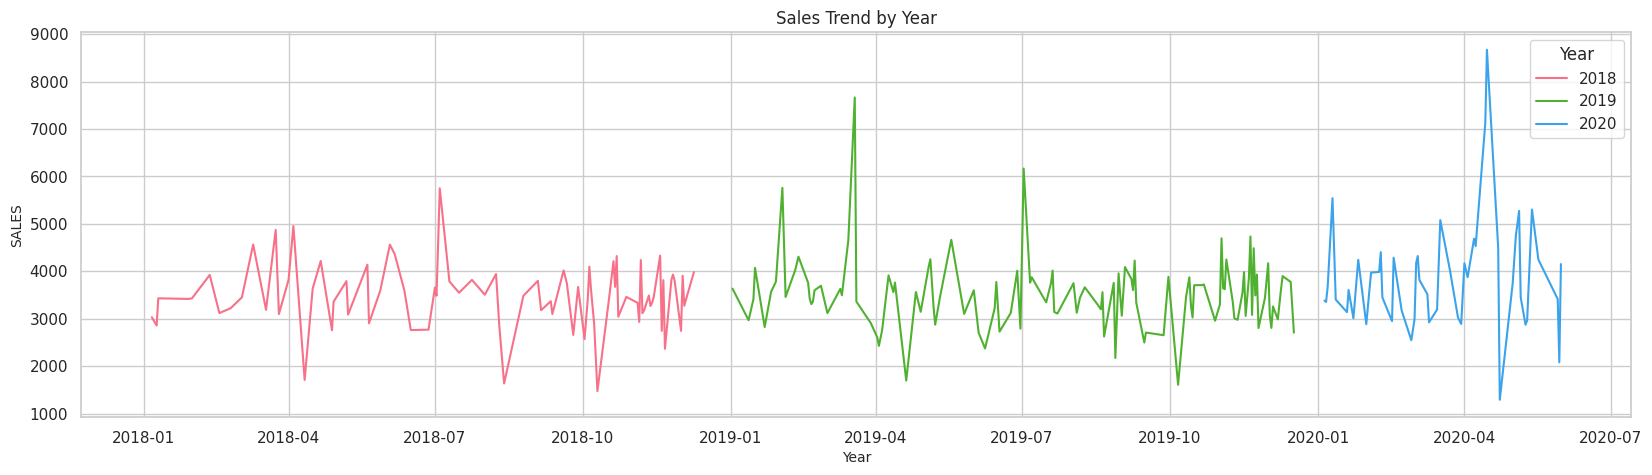

In [ ]:
# Sales trend by Year
sns.set(style="whitegrid",rc={"figure.figsize":(20,5)})
sns.lineplot(data=df,x="ORDERDATE",y='SALES',ci=None,hue="Year",palette=sns.color_palette("husl",len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year",fontsize=10)
plt.ylabel("SALES",fontsize=10)
plt.legend(title="Year")
plt.show()

<ipython-input-47-8d3de3ed6dc4>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




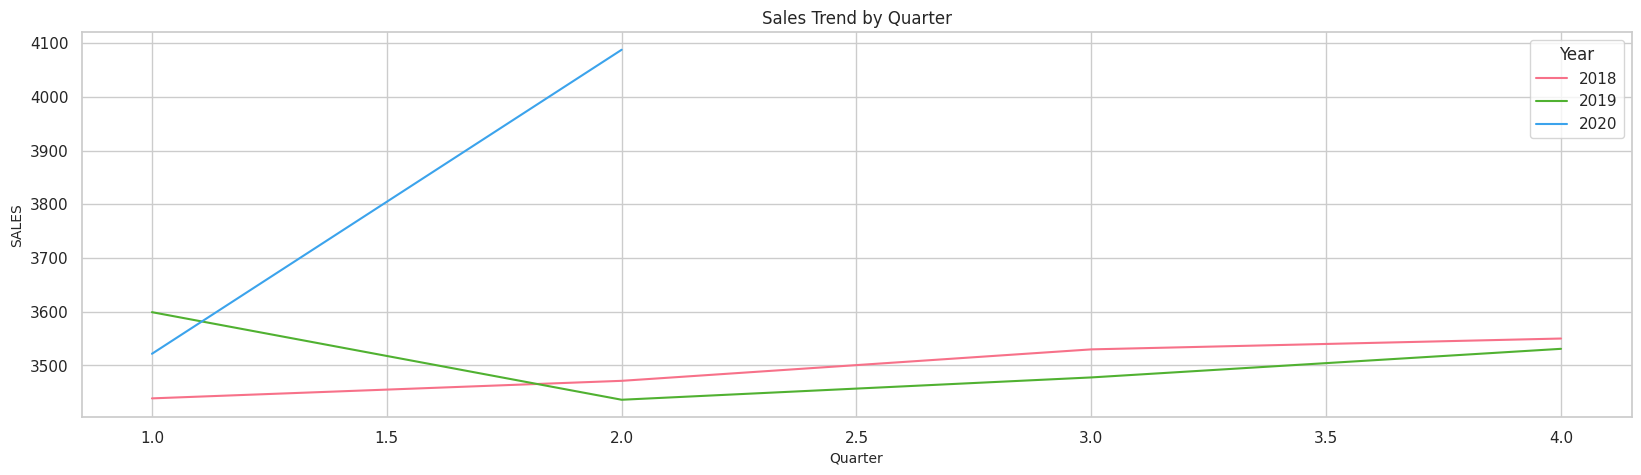

In [ ]:
# Sales trend by Quarter
sns.set(style="whitegrid",rc={"figure.figsize":(20,5)})
sns.lineplot(data=df,x="Quarter",y='SALES',ci=None,hue="Year",palette=sns.color_palette("husl",len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter",fontsize=10)
plt.ylabel("SALES",fontsize=10)
plt.legend(title="Year")
plt.show()



<ipython-input-48-c1c685796e53>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




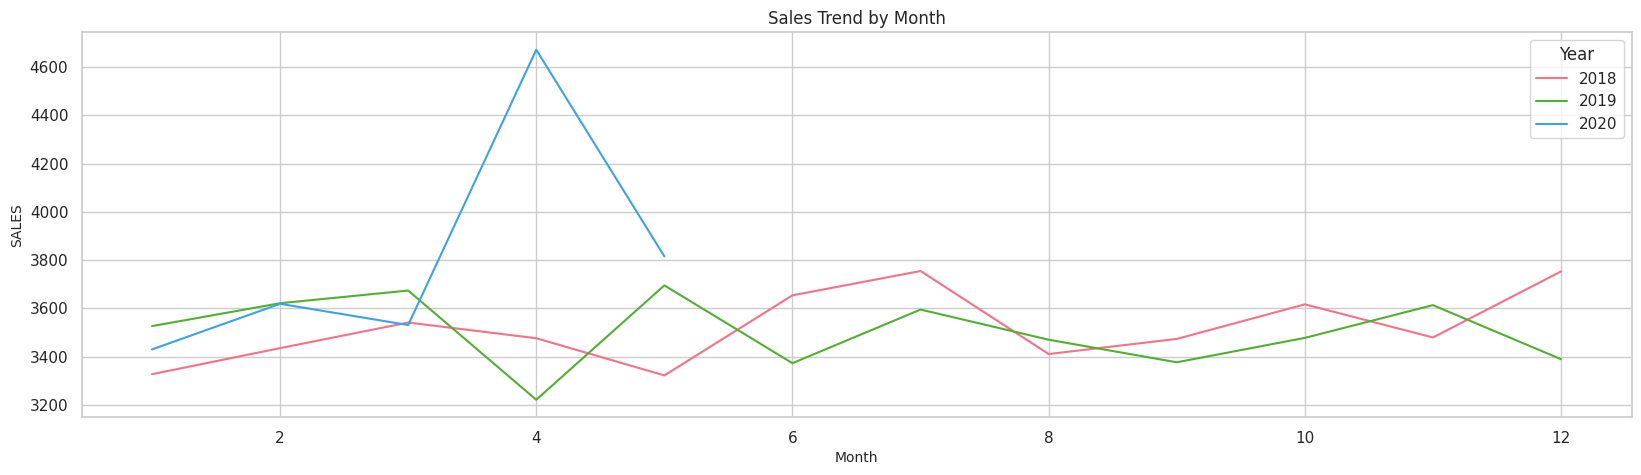

In [ ]:
# Sales trend by Month
sns.set(style="whitegrid",rc={"figure.figsize":(20,5)})
sns.lineplot(data=df,x="Month",y='SALES',ci=None,hue="Year",palette=sns.color_palette("husl",len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month",fontsize=10)
plt.ylabel("SALES",fontsize=10)
plt.legend(title="Year")
plt.show()


<ipython-input-49-8e30b8098f33>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




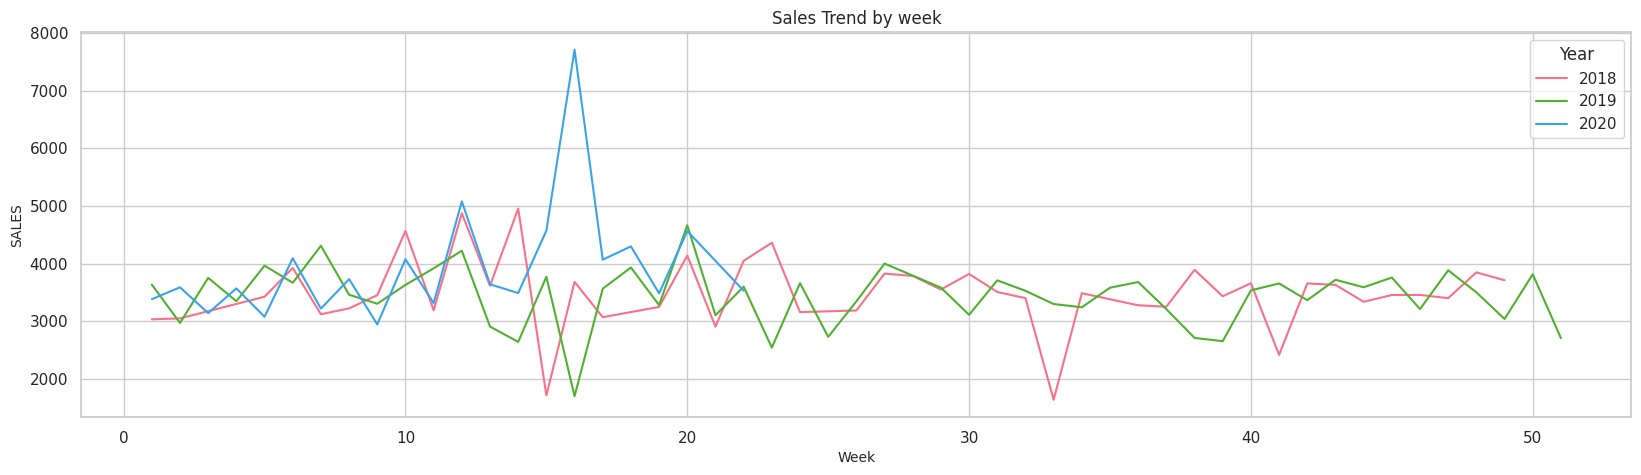

In [ ]:
# Sales trend by Week
sns.set(style="whitegrid",rc={"figure.figsize":(20,5)})
sns.lineplot(data=df,x="Week",y='SALES',ci=None,hue="Year",palette=sns.color_palette("husl",len(df['Year'].unique())))
plt.title("Sales Trend by week")
plt.xlabel("Week",fontsize=10)
plt.ylabel("SALES",fontsize=10)
plt.legend(title="Year")
plt.show()



## <b><span style='color:#fa762f'> </span><span style='color:#b58a12'> Multivariate Analysis</span></b>

<ipython-input-53-1e1846c856ca>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




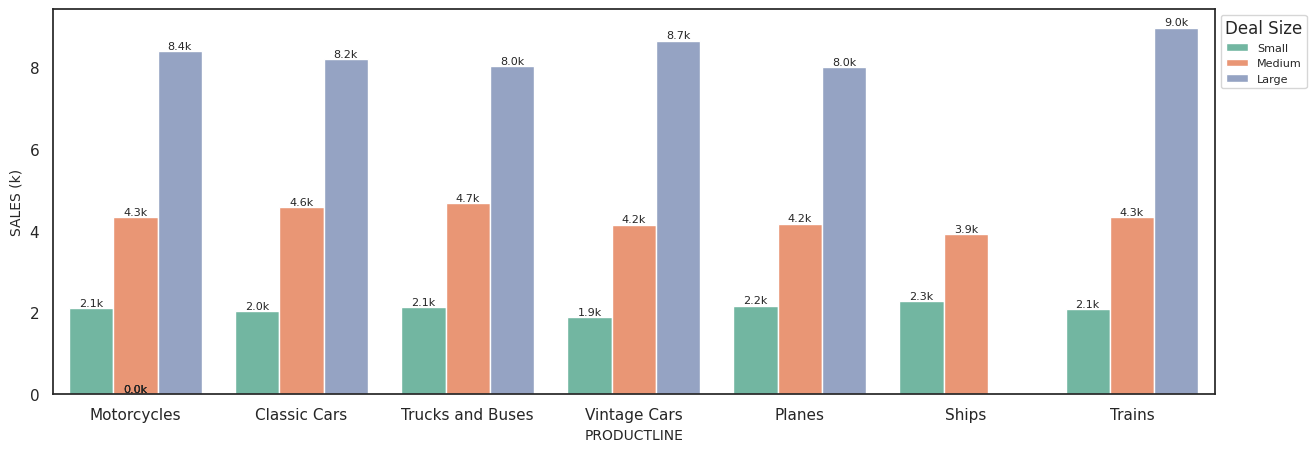

In [ ]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white",rc={"figure.figsize":(15,5)})
df["SALES (k)"] = df["SALES"] / 1000
sns.barplot(data=df,x="PRODUCTLINE",y="SALES (k)",hue="DEALSIZE",palette="Set2",ci=None)
plt.xlabel("PRODUCTLINE",fontsize=10)
plt.ylabel("SALES (k)",fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=8,loc="upper left",bbox_to_anchor=(1,1))
plt.show()

<ipython-input-54-3457eec4d20b>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




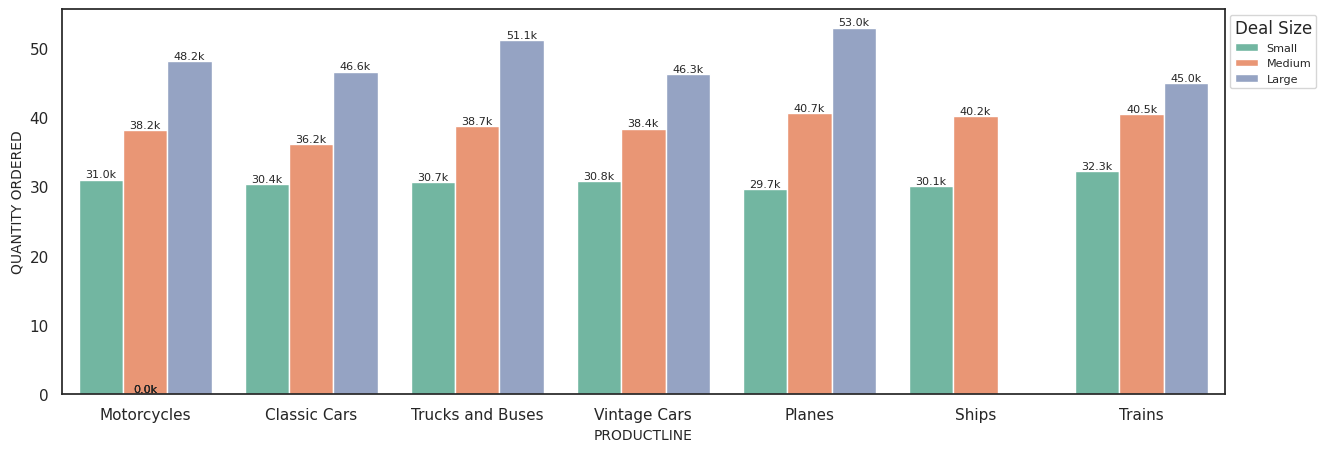

In [ ]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue
sns.set(style="white",rc={"figure.figsize":(15,5)})
sns.barplot(data=df,x="PRODUCTLINE",y="QUANTITYORDERED",hue="DEALSIZE",palette="Set2",ci=None)
plt.xlabel("PRODUCTLINE",fontsize=10)
plt.ylabel("QUANTITY ORDERED",fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=8,loc="upper left",bbox_to_anchor=(1,1))
plt.show()


<ipython-input-55-fd92e1039bc4>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




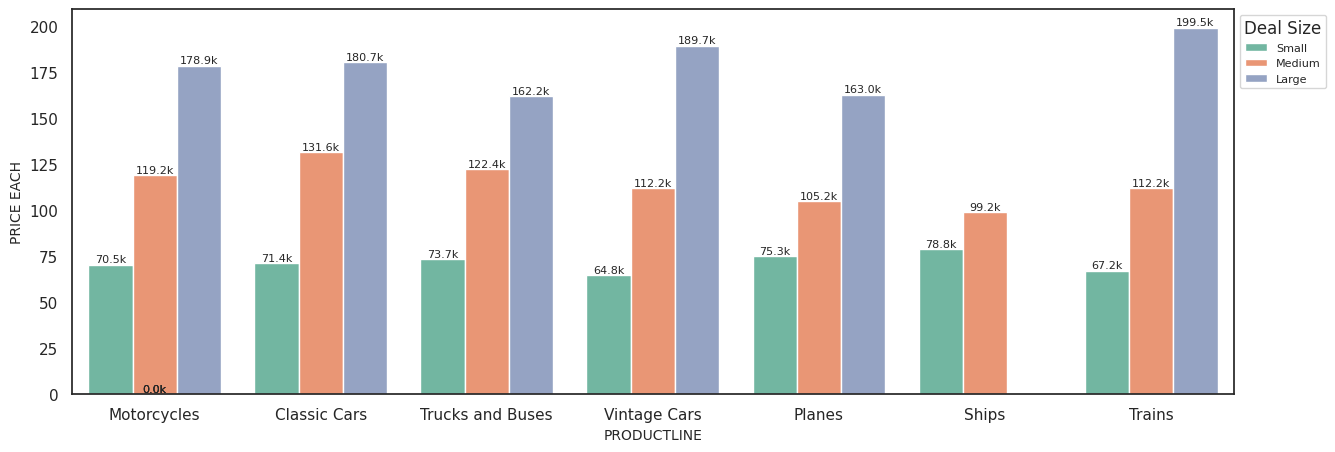

In [ ]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue
sns.set(style="white",rc={"figure.figsize":(15,5)})
sns.barplot(data=df,x="PRODUCTLINE",y="PRICEEACH",hue="DEALSIZE",palette="Set2",ci=None)
plt.xlabel("PRODUCTLINE",fontsize=10)
plt.ylabel("PRICE EACH",fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=8,loc="upper left",bbox_to_anchor=(1,1))
plt.show()


<ipython-input-57-8b8e6d2d2139>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




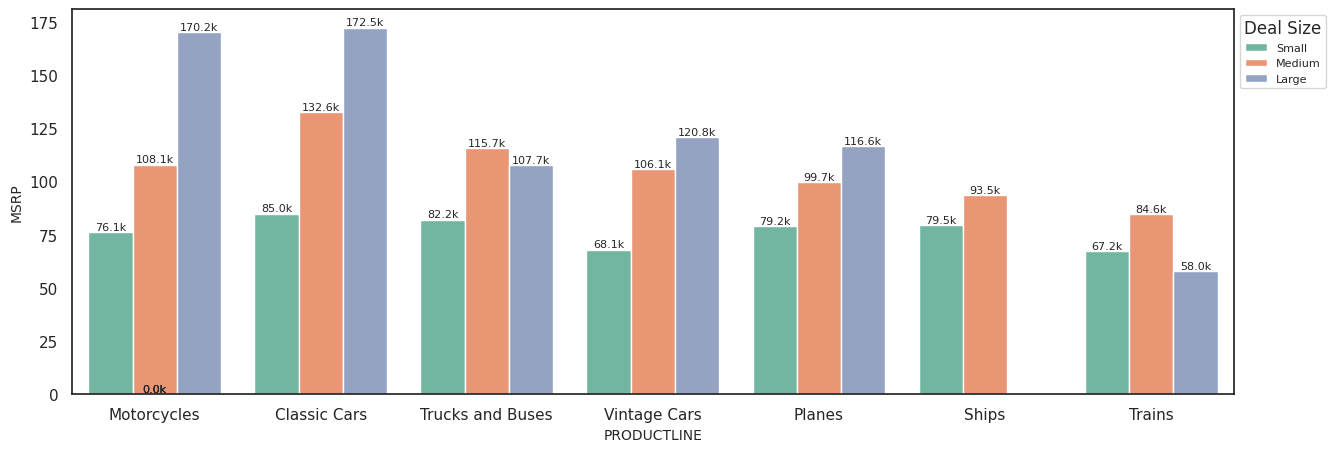

In [ ]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue
sns.set(style="white",rc={"figure.figsize":(15,5)})
sns.barplot(data=df,x="PRODUCTLINE",y="MSRP",hue="DEALSIZE",palette="Set2",ci=None)
plt.xlabel("PRODUCTLINE",fontsize=10)
plt.ylabel("MSRP",fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=8,loc="upper left",bbox_to_anchor=(1,1))
plt.show()


<ipython-input-58-2ca4ed00248f>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




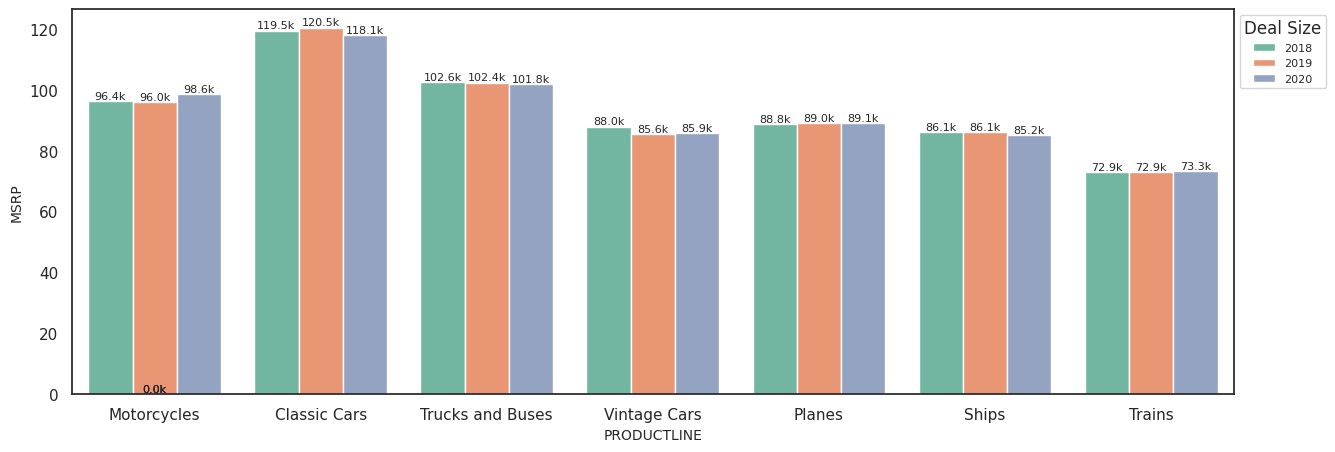

In [ ]:

sns.set(style="white",rc={"figure.figsize":(15,5)})
sns.barplot(data=df,x="PRODUCTLINE",y="MSRP",hue="Year",palette="Set2",ci=None)
plt.xlabel("PRODUCTLINE",fontsize=10)
plt.ylabel("MSRP",fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=8,loc="upper left",bbox_to_anchor=(1,1))
plt.show()


<ipython-input-60-ce13cd84bd9d>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




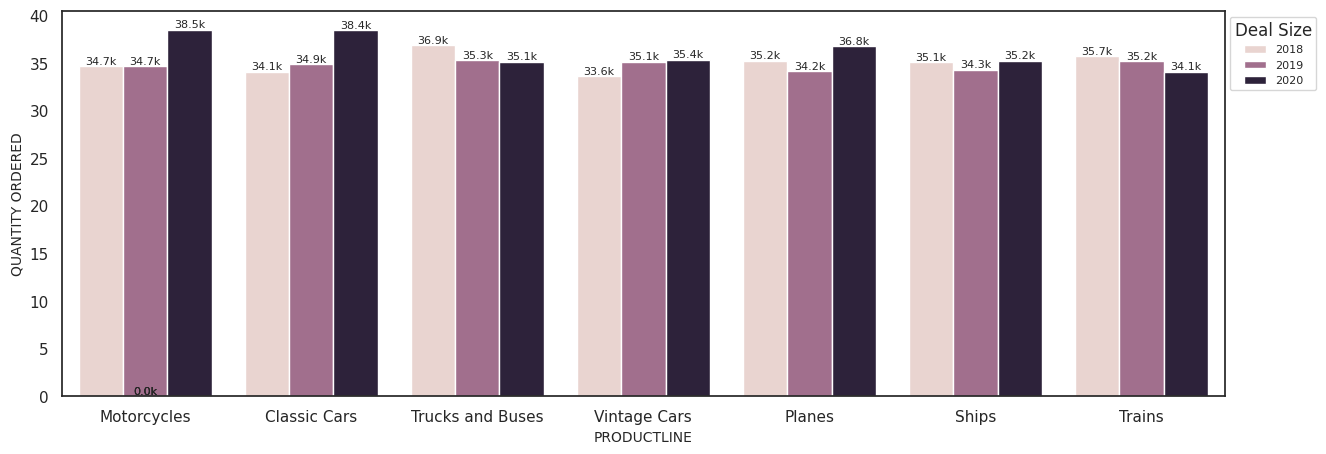

In [ ]:
sns.set(style="white",rc={"figure.figsize":(15,5)})
sns.barplot(data=df,x="PRODUCTLINE",y="QUANTITYORDERED",hue="Year",ci=None)
plt.xlabel("PRODUCTLINE",fontsize=10)
plt.ylabel("QUANTITY ORDERED",fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}k',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=8,loc="upper left",bbox_to_anchor=(1,1))
plt.show()




## <b><span style='color:#fa762f'> </span><span style='color:#ad8b2b'> Key Insights from Analysis </span></b>

<div style="border-radius: 1px; border: # solid; padding: 1px; background-color: #fcf8e3; font-size: 140%; text-align: left;">
  
**Sales Overview:**
- **298 orders** placed by **89 customers** from **19 countries** in the last **2.5 years**.
- **United States** leads in sales, followed by **Spain** and **France**. Notable sales from **Australia** and **Singapore** in the Eastern Hemisphere.
- Among cities, **Madrid** tops sales, with **San Diego** and **New York City** following.
- In the Eastern Hemisphere, sales from **Australia** and **Singapore** declined, while customers from **Japan** were added in **2019**.
- Significant sales increase observed in **US** and **France** in **2019**.

**Product and Revenue:**
- The company manufactures **109 automobile parts** under **7 product lines** with prices ranging from **26 to 252**.
- **Classic Car parts** generate the maximum revenue through sales (approx. **40%**).
- **Car, Truck, Bus, and Motorcycle parts** account for **80%** of the company's revenue.

**Sales Trends:**
- Upward sales trend with **monthly seasonality**. Peak sales in **October and November** annually.
- Higher sales and customer activity in the **early months of 2020** compared to previous years.

**Concern**
- **No new customers** added since **September 2019**.

**Transaction Characteristics:**
- Most deals are of **medium and small size**, with transactions typically containing **20 to 50 items**.

**Key Customers:**
- **Euro Shopping Channel** and **Mini Gifts Distribution Ltd.** are **best customers** (highest spending, most frequent, and recent).

**Customer Retention:**
- A good **customer retention rate of approximately 90%** was observed in **2019**.